# 自定义卷积函数

In [12]:
import numpy as np
from PIL import Image

def ImgConv(image_array, kernel):
    '''parameters description:
       image_array: input gray image matrix
       kernel: convolution kernel
       return convolution result
    '''
    
    # 定义基本参数
    image_arr = image_array.copy()
    img_dim1, img_dim2 = image_arr.shape
    k_dim1, k_dim2 = kernel.shape
    AddW = int((k_dim1-1)/2)
    AddH = int((k_dim2-1)/2)
    
    # Padding 填充
    temp = np.zeros([img_dim1 + AddW*2, img_dim2 + AddH*2])
    # 将原图放在零矩阵中间
    temp[AddW:AddW+img_dim1,AddH:AddH+img_dim2] = image_arr[:,:]
    # 初始化一张同样大小的图片作为输出图片
    output = np.zeros_like(a=temp)
    
    # 卷积计算
    for i in range(AddW, img_dim1+AddW):
        for j in range(AddH, img_dim2+AddH):
            output[i][j] = int(np.sum(temp[i-AddW:i+AddW+1,j-AddH:j+AddH+1]*kernel))
            
    return output[AddW:img_dim1+AddW, AddH:img_dim2+AddH]

# 定义卷积核

In [13]:
# 提取竖直方向特征
# sobel_x
kernel_1 = np.array(
           [[-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]])
# 提取水平方向特征
# sobel_y
kernel_2 = np.array(
           [[-1,-2,-1],
            [ 0, 0, 0],
            [ 1, 2, 1]])
#  Laplace扩展算子
# 二阶微分算子
kernel_3 = np.array(
           [[1, 1, 1],
            [1,-8, 1],
            [1, 1, 1]])

# 卷积操作

In [21]:
# 打开图像并转化为灰度图片
image = Image.open(r'C:\Users\AndreaK\Downloads\2020-02-28_23-08-08.jpg').convert('L')

# 将图片转化为数组
image_array = np.array(image)

# 卷积操作
sobel_x = ImgConv(image_array, kernel_1)
sobel_y = ImgConv(image_array, kernel_2)
laplace = ImgConv(image_array, kernel_3)

# 显示

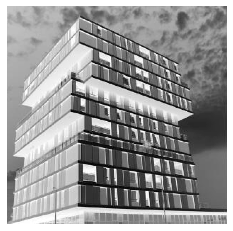

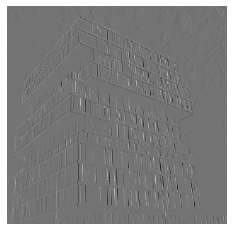

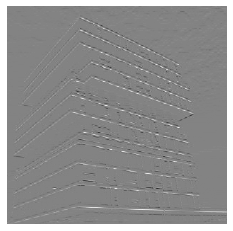

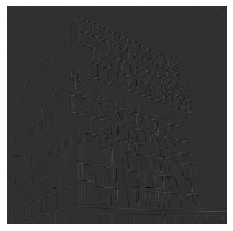

In [22]:
# 显示图像
import matplotlib.pyplot as plt

plt.imshow(image_array, cmap='gray_r')
plt.axis('off')
plt.show()

plt.imshow(sobel_x, cmap='gray_r')
plt.axis('off')
plt.show()

plt.imshow(sobel_y, cmap='gray_r')
plt.axis('off')
plt.show()

plt.imshow(laplace, cmap='gray_r')
plt.axis('off')
plt.show()